# 자연어처리 시작 (한글 챗봇File 중심) 



# 텍스트 처리의 여러 라이브러리 활용법 !!


# +++++++++++++++++++++++++++++++




## 교재의 챕더 1,2,3 통해서 기본을 학습하고

## 챕터 4장 5장에서 텍스트분류와 유사도를 

## 팀별 발료로 학습한다. 교재의 목표는 챕터 6

## 수학교육용 한글 챗봇을 만드는 것이다 





# [목표] 교재의 2~3장 영어한글 자연어처리  !!


# +++++++++++++++++++++++++++++++




## WinPython37F 에 이미 설치된 라이브러리

import tensorflow.compat.v1  as tf

from tensorflow.keras import preprocessing

## 자연어 처리에 사용되는 여러 라이브러리를 익힌다

### 1.sklearn 
### 2. java-jpype-konlpy 
### 3 matplotlib

# ===================================

# ===================================

###  import pandas as pd

### DATA_IN_PATH = './data_in/'

### data = pd.read_csv(DATA_IN_PATH + 'ChatBotData.csv', encoding='utf-8')

### print( data.head )

## data 

# ===================================

# 1. sklearn 라이브러리를 활용한 데이터분석

# 2.2 Sklearn

* 데이터 불러오기
* 2.2.1. 싸이킷-런 데이터 분리
* 2.2.2. 싸이킷-런 지도 학습
* 2.2.3. 싸이킷-런 비지도 학습
* 2.2.4. 싸이킷-런 특징 추출

### 데이터 불러오기

In [1]:
import sklearn
sklearn.__version__

from sklearn.datasets import load_iris

In [2]:
iris_dataset = load_iris()
print("iris_dataset key: {}".format(iris_dataset.keys()))

iris_dataset key: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris_dataset['data'][0:5])
print("shape of data: {}". format(iris_dataset['data'].shape))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
shape of data: (150, 4)


In [4]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris_dataset['target'])
print(iris_dataset['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [6]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 2.2.1. 싸이킷-런 데이터 분리

In [7]:
target = iris_dataset['target']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'],
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state=42)

In [10]:
print("shape of train_input: {}".format(train_input.shape))
print("shape of test_input: {}".format(test_input.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_label: {}".format(test_label.shape))

shape of train_input: (112, 4)
shape of test_input: (38, 4)
shape of train_label: (112,)
shape of test_label: (38,)


## 2.2.2. 싸이킷-런 지도 학습

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [12]:
knn.fit(train_input, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
import numpy as np
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])

In [14]:
knn.predict(new_input)

array([1])

In [15]:
predict_label = knn.predict(test_input)
print(predict_label)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [16]:
print('test accuracy {:.2f}'.format(np.mean(predict_label == test_label)))

test accuracy 1.00


## 2.2.3. 싸이킷-런 비지도 학습

In [17]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)

In [18]:
k_means.fit(train_input)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
k_means.labels_

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 2])

In [20]:
print("0 cluster:", train_label[k_means.labels_ == 0])
print("1 cluster:", train_label[k_means.labels_ == 1])
print("2 cluster:", train_label[k_means.labels_ == 2])

0 cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 cluster: [2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 2 1]
2 cluster: [2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2]


In [21]:
import numpy as np
new_input  = np.array([[6.1, 2.8, 4.7, 1.2]])

In [22]:
prediction = k_means.predict(new_input)
print(prediction)

[1]


In [23]:
predict_cluster = k_means.predict(test_input)
print(predict_cluster)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 0 1 1
 0]


In [24]:
np_arr = np.array(predict_cluster)
np_arr[np_arr==0], np_arr[np_arr==1], np_arr[np_arr==2] = 3, 4, 5
np_arr[np_arr==3] = 1
np_arr[np_arr==4] = 0
np_arr[np_arr==5] = 2
predict_label = np_arr.tolist()
print(predict_label)

[0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1]


In [25]:
print('test accuracy {:.2f}'.format(np.mean(predict_label == test_label)))

test accuracy 0.26


## 2.2.4. 싸이킷-런 특징 추출

* CountVectorizer
* TfidfVectorizer

### CountVectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

count_vectorizer = CountVectorizer()

In [48]:
count_vectorizer.fit(text_data)
print(count_vectorizer.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [49]:
sentence = [text_data[0]] # ['나는 배가 고프다']
print(count_vectorizer.transform(sentence).toarray())

[[1 0 1 0 0 0 1 0 0 0]]


### TfidfVectorizer

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']
tfidf_vectorizer = TfidfVectorizer()

In [52]:
tfidf_vectorizer.fit(text_data)
print(tfidf_vectorizer.vocabulary_)

sentence = [text_data[3]] # ['점심 먹고 공부 해야지']
print(tfidf_vectorizer.transform(text_data).toarray())

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}
[[0.57735027 0.         0.57735027 0.         0.         0.
  0.57735027 0.         0.         0.        ]
 [0.         0.         0.         0.52640543 0.         0.66767854
  0.         0.52640543 0.         0.        ]
 [0.         0.52640543 0.         0.52640543 0.         0.
  0.         0.         0.66767854 0.        ]
 [0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]




# ==============================



# 2. 한글 토크나이징 라이브러리

# ++++++++++++++++++++++++++++++


# Java 와 Jpype 와 Konlpy 설치 및 활용

## 교재 2.3 (72쪽)  + 교재 6.1 ~ 6.2 (287쪽)



# ==============================

### JAVA 를 먼저 설치해야한다. Java 버젼 8로 하자

### 설치하고, 설치된 bin 위치를 Path 로 설정한다

    
    환경변수 시스템변수 JAVA_HOME 자바 8.0 사용하고 설정 

    ===> Path = %JAVA_HOME%\bin

    pip install JPype1==0.7.0 (0.7.1 안됨)
    pip install konlpy==0.5.2
    
### WinPython36F 에 이미 konlpy, JPype 설치가 되어있다
    
### 그러나 윈도우 노트북에 Path 설정 등은 각자가 해야한다 

In [5]:
import konlpy
import jpype

print( konlpy.__version__)
print( jpype.__version__ )

0.5.2
0.7.0


In [6]:
from konlpy.tag import Okt

okt = Okt()

print(okt.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'))


text="와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔"
print( okt.morphs(text) )

okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem=True)



[('이', 'Noun'), ('밤', 'Noun'), ('그날', 'Noun'), ('의', 'Josa'), ('반딧불', 'Noun'), ('을', 'Josa'), ('당신', 'Noun'), ('의', 'Josa'), ('창', 'Noun'), ('가까이', 'Noun'), ('보낼게요', 'Verb')]
['와', '이런', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만드는', '게', '나을', '뻔']


['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [26]:
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

# 교재 2.4 (79쪽) : 한글 챗봇 데이터 분석
<p> &nbsp;
    
    
# 강의에서 다룰 한글 챗봇 데이터에 적용 


## data_in/ChatBotData.csv


## data_nmt/conversation2.csv




# ++++++++++++++++++++++++++++++++++

# 3. 데이터 시각화 : matplotlib 활용법

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#matplotlib inline


from collections import Counter


from functools import reduce
from wordcloud import WordCloud

# pip insrall wordcloud 필요

In [9]:
DATA_IN_PATH = './data_in/'

data = pd.read_csv(DATA_IN_PATH + 'ChatBotData.csv', encoding='utf-8')

In [12]:
print( data.head )

data 
# print(data) 하면 ??

<bound method NDFrame.head of                              Q                         A  label
0                       12시 땡!                하루가 또 가네요.      0
1                  1지망 학교 떨어졌어                 위로해 드립니다.      0
2                 3박4일 놀러가고 싶다               여행은 언제나 좋죠.      0
3              3박4일 정도 놀러가고 싶다               여행은 언제나 좋죠.      0
4                      PPL 심하네                눈살이 찌푸려지죠.      0
...                        ...                       ...    ...
11818           훔쳐보는 것도 눈치 보임.        티가 나니까 눈치가 보이는 거죠!      2
11819           훔쳐보는 것도 눈치 보임.             훔쳐보는 거 티나나봐요.      2
11820              흑기사 해주는 짝남.                    설렜겠어요.      2
11821  힘든 연애 좋은 연애라는게 무슨 차이일까?  잘 헤어질 수 있는 사이 여부인 거 같아요.      2
11822               힘들어서 결혼할까봐        도피성 결혼은 하지 않길 바라요.      2

[11823 rows x 3 columns]>


,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [13]:
sentences = list(data['Q']) + list(data['A'])

### 아래를 실행시키면 시간이 걸린다. konlpy 의 Okt 불러서 처리

In [14]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

Text(0, 0.5, 'Number of Sentences')

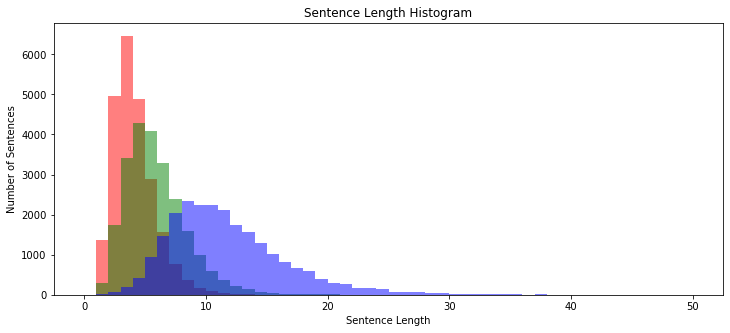

In [15]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

Text(0, 0.5, 'Number of Sentences')

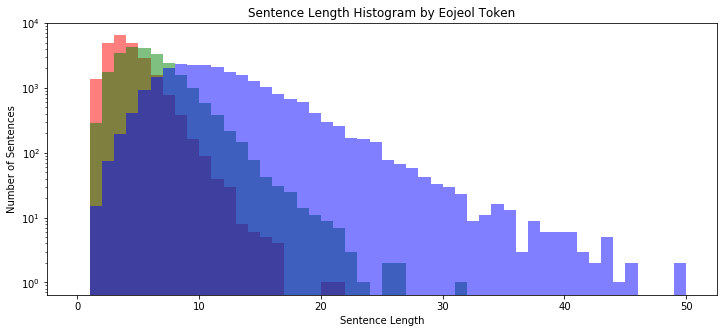

In [16]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram by Eojeol Token')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

In [17]:
print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('제 1 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대길이: 21
어절 최소길이: 1
어절 평균길이: 3.64
어절 길이 표준편차: 1.74
어절 중간길이: 3.0
제 1 사분위 길이: 2.0
제 3 사분위 길이: 5.0


In [18]:
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.41
형태소 길이 표준편차: 2.56
형태소 중간길이: 5.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 7.0


In [19]:
print('음절 최대길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('음절 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('음절 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대길이: 57
음절 최소길이: 1
음절 평균길이: 11.31
음절 길이 표준편차: 4.98
음절 중간길이: 10.0
음절 1/4 퍼센타일 길이: 8.0
음절 3/4 퍼센타일 길이: 14.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1d4e40d75f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4890f7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4890f7048>,
 'medians': [<matplotlib.lines.Line2D at 0x1d4890f7eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d4e40d78d0>,
 'means': [<matplotlib.lines.Line2D at 0x1d4891094a8>,
  <matplotlib.lines.Line2D at 0x1d4891f5a20>]}

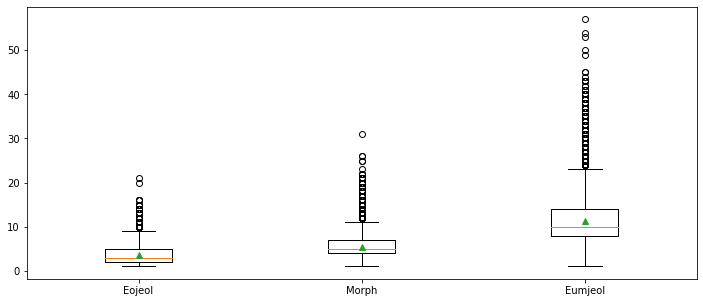

In [20]:

plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels=['Eojeol', 'Morph', 'Eumjeol'], 
            showmeans=True)

### 아래의 실행에도 시간이 걸립니다.

In [21]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

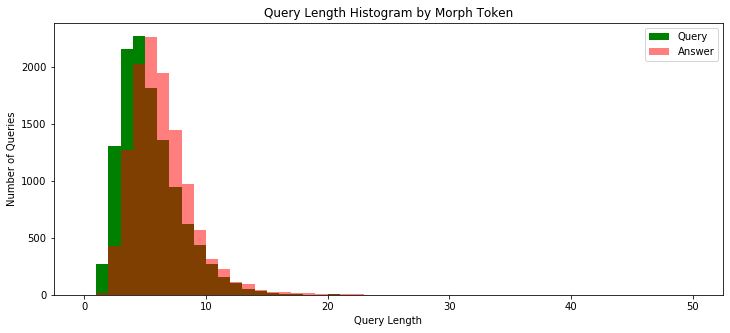

In [22]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

Text(0, 0.5, 'Number of Queries')

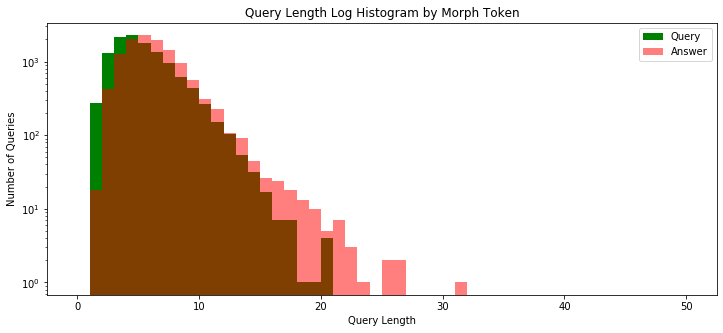

In [23]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Length Log Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

In [ ]:
print('형태소 최대길이: {}'.format(np.max(query_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(query_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(query_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(query_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(query_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 75)))

In [ ]:
print('형태소 최대길이: {}'.format(np.max(answer_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(answer_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(answer_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(answer_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(answer_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 75)))

In [ ]:
okt.pos('오늘밤은유난히덥구나')

### 아래 실행에 시간이 걸린다

In [25]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)
            
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

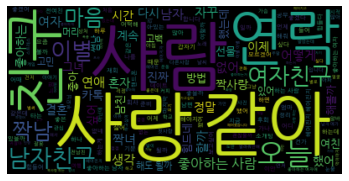

In [27]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

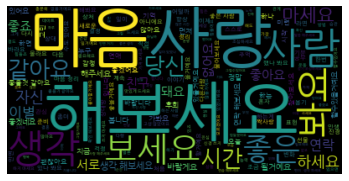

In [28]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()